In [24]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
df = pd.read_csv('dataset.csv',index_col=0)

# Analysis

Проанализирую датасет и целевое событие 

In [27]:
df.head(5)

,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,cmlt_final_level,cmlt_count_grind,cmlt_max_grind,cmlt_count_won_grind,cmlt_hard_buy,cmlt_hard_earn,cmlt_hard_gift,cmlt_hard_spent,cmlt_hard_max_spent,country,country_top_tier,network_name,date_install,first_command_time,cmlt_time_4grind,cmlt_time_with_us_4grind,cmlt_avg_time_for_level,cmlt_avg_duration,cmlt_avg_grind_duration,cmlt_winrate,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency
0,0.0,0,117,234,2,0,0,0,0,1,0,0,0,0,0,15,0,0,RU,0,NaN,2021-03-13,2021-02-07 10:41:50.0,0.000000,0.000000,234.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,0.0,125,668,668,1,1448,4,271,28,1,2,2,2,0,0,15,0,0,MD,0,Facebook Installs,2021-04-22,2021-03-19 23:02:10.0,0.002994,0.016000,668.000000,668.000000,334.000000,1.000000,0.000000,0.000000,62.500000,0.000000,NaN,NaN,False,False,NaN,0.0
2,0.0,14070,4137,15551,12,41220,119,796,275,6,67,69,24,0,5,15,20,16,US,1,Organic,2021-03-24,2021-02-18 19:55:22.0,0.004308,0.004762,2591.833333,1295.916667,232.104478,0.358209,0.298507,0.298507,210.000000,2.857143,1935-10-22,female,False,False,NaN,0.0
3,0.0,0,290,290,1,176,2,44,3,1,1,1,1,0,0,30,0,0,BR,0,Organic,2021-03-25,2021-02-19 16:09:34.0,0.003448,0.000000,290.000000,290.000000,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1987-08-08,female,False,True,NaN,0.0
4,0.0,887,1002,1002,1,2448,12,123,121,4,7,7,7,0,2,15,0,0,RU,0,Vungle,2021-04-01,2021-02-26 07:45:15.0,0.006986,0.007892,250.500000,1002.000000,143.142857,1.000000,0.000000,0.000000,126.714286,0.000000,NaN,NaN,False,False,NaN,0.0


In [28]:
print(f"Размерность датасета: {df.shape}")

Размерность датасета: (250006, 39)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250006 entries, 0 to 250005
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cmlt_daily_game_currency       250006 non-null  float64
 1   cmlt_seconds_with_us           250006 non-null  int64  
 2   cmlt_max_sessions_duration     250006 non-null  int64  
 3   cmlt_sum_sessions_duration     250006 non-null  int64  
 4   cmlt_count_sessions            250006 non-null  int64  
 5   cmlt_sum_quantum_duration      250006 non-null  int64  
 6   cmlt_count_quant               250006 non-null  int64  
 7   cmlt_max_quantum_duration      250006 non-null  int64  
 8   cmlt_max_quant                 250006 non-null  int64  
 9   cmlt_final_level               250006 non-null  int64  
 10  cmlt_count_grind               250006 non-null  int64  
 11  cmlt_max_grind                 250006 non-null  int64  
 12  cmlt_count_won_grind           2500

Посмотрим на пропущенные значения

In [30]:
nan_fraction = pd.DataFrame(df.isna().mean(), columns=['fraction']).reset_index().rename(columns={'index':'columns'})

В основном категориальные данные имеют пропуски. 

In [31]:
nan_fraction.query('fraction > 0')

,columns,fraction
18,country,0.000224
20,network_name,0.100622
33,birthday,0.743034
34,sex,0.747842
35,is_cheater,0.022635
36,has_email,0.022635
37,time_confirm_email,0.983064


Целевое событие принимает 2713 уникальных значений. Решаем задачу регрессии.

In [32]:
df['target_game_currency'].nunique()

2713

На гистограмме большая часть значений целевого собятия принимает значение 0

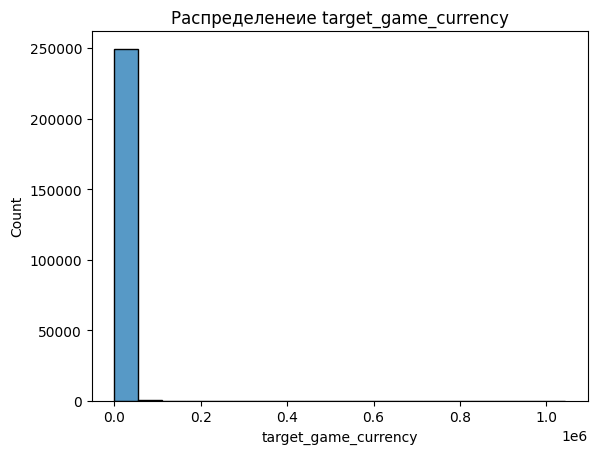

In [33]:
sns.histplot(df['target_game_currency'])
plt.title('Распределенеие target_game_currency')
plt.show()

Проанализируем целевое событие по перцентилеям

In [34]:
df[['target_game_currency']].describe()

,target_game_currency
count,2.500060e+05
mean,4.783516e+02
std,8.782120e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.044268e+06


In [35]:
data = df['target_game_currency']
percentiles = range(1, 101)
percentile_values = np.percentile(data, percentiles)

In [36]:
percentile_df = pd.DataFrame({'Percentile': percentiles, 'Value': percentile_values})

На 97 перцентиле находятся все наши наблюдения целевого события

In [37]:
percentile_df.tail(10)

,Percentile,Value
90,91,0.00
91,92,0.00
92,93,0.00
93,94,0.00
94,95,0.00
95,96,0.00
96,97,94.05
97,98,850.25
98,99,5697.15
99,100,1044267.55


In [38]:
df['cat_col_target']  = df['target_game_currency'].apply(lambda x: 1 if x>0.0 else 0 )
df['log_col_target']  = df['target_game_currency'].apply(lambda x: np.log(x) )

In [39]:
df['cat_col_target'].value_counts(normalize = True)

cat_col_target
0    0.963657
1    0.036343
Name: proportion, dtype: float64

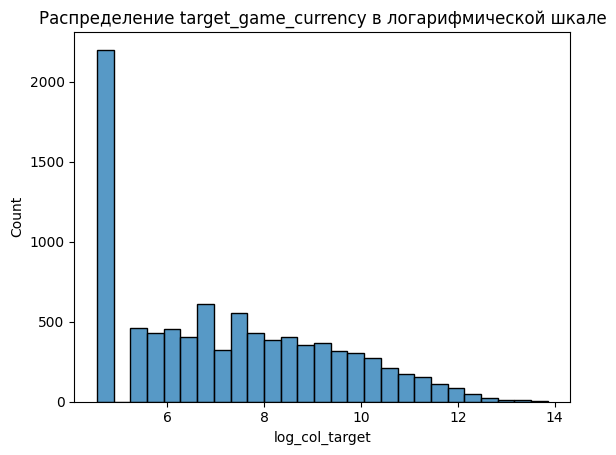

In [40]:
sns.histplot(df['log_col_target'])
plt.title('Распределение target_game_currency в логарифмической шкале')
plt.show()

In [41]:
df['birthday'] = pd.to_datetime(df['birthday'])
df['date_install'] = pd.to_datetime(df['date_install'])

In [45]:
df.select_dtypes('datetime').head(5)

,date_install,birthday
0,2021-03-13,NaT
1,2021-04-22,NaT
2,2021-03-24,1935-10-22
3,2021-03-25,1987-08-08
4,2021-04-01,NaT


In [54]:
df['age'] = ((df['date_install'] - df['birthday']) / pd.Timedelta(days=365.25))


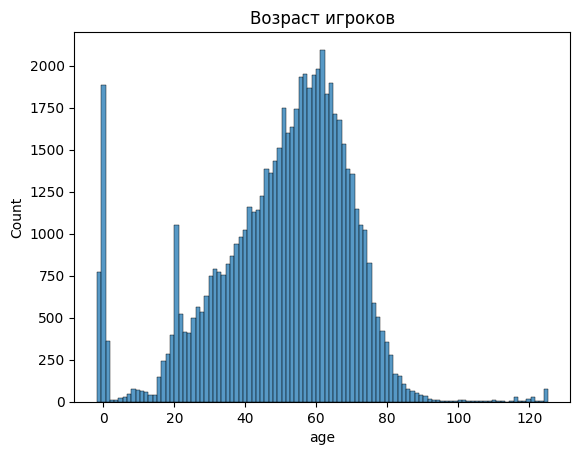

In [55]:
sns.histplot(df['age'])
plt.title('Возраст игроков')
plt.show()

In [56]:
df['age'].value_counts()

age
0.093087     64
0.087611     57
0.090349     56
0.082136     37
0.079398     31
             ..
19.457906     1
42.685832     1
25.503080     1
20.774812     1
83.904175     1
Name: count, Length: 22351, dtype: int64

Средний возраст 50 лет, етсь наблюдения где -1. Как  признак не надежный и в признаках по дате рождения 70% данных отсутствует

In [57]:
df['age'].describe()

count    64243.000000
mean        50.354267
std         19.486147
min         -1.806982
25%         39.649555
50%         53.804244
75%         63.950719
max        125.245722
Name: age, dtype: float64

In [130]:
(df
 .groupby('age')
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False)
 ).head(10)

,age,mean,min,max,sum
64,62.0,2666.402846,0.0,998700.80,4263578.15
65,63.0,2740.267193,0.0,429296.45,4167946.40
59,57.0,2390.497583,0.0,717893.15,3808062.65
57,55.0,2139.973439,0.0,575563.20,3428237.45
68,66.0,2454.840190,0.0,535532.10,3365585.90
67,65.0,2237.913310,0.0,254068.95,3144268.20
61,59.0,1880.228125,0.0,389517.10,3068532.30
74,72.0,3051.666135,0.0,847061.80,2581709.55
69,67.0,1985.635927,0.0,308692.05,2539628.35
71,69.0,2212.545815,0.0,643376.10,2511239.50


Женщины приносят много денег на 66.7%. Но признак пол тоже на 70% не полный и как признак тоже не подходит 

In [59]:
df.groupby('sex')['target_game_currency'].agg({'sum','mean','min','max'})

,max,mean,sum,min
sex,,,,
female,998700.80,1622.804312,61376081.90,0.0
male,717893.15,937.798210,20401800.05,0.0
other,643376.10,1657.449509,5743062.55,0.0


In [60]:
(df
 .groupby(['sex','age'])
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('mean',ascending=False)
 ).head(20)

,sex,age,max,mean,sum,min
31177,other,69.325120,643376.10,643376.100000,643376.10,643376.10
15642,female,77.697467,436376.80,436376.800000,436376.80,436376.80
14502,female,72.514716,847061.80,423530.900000,847061.80,0.00
10481,female,59.865845,389517.10,389517.100000,389517.10,389517.10
15456,female,76.676249,719246.90,359623.450000,719246.90,0.00
24207,male,57.943874,717893.15,358946.575000,717893.15,0.00
24189,male,57.880903,357723.45,357723.450000,357723.45,357723.45
12114,female,64.698152,323921.50,323921.500000,323921.50,323921.50
14353,female,71.989049,618271.40,309182.725000,618365.45,94.05
7812,female,51.780972,590988.35,295494.175000,590988.35,0.00


In [71]:
group_df_country = (df
 .groupby('country')
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False))

<Axes: xlabel='country', ylabel='sum'>

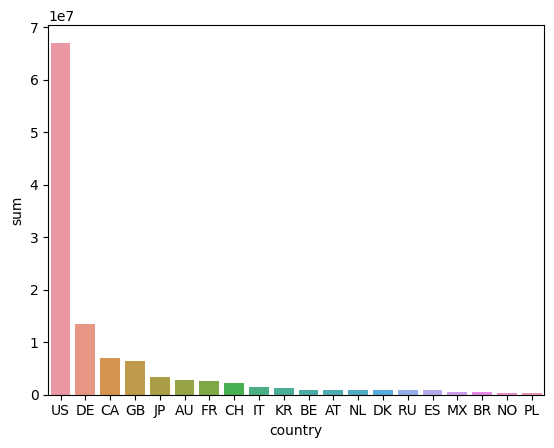

In [78]:
sns.barplot(group_df_country.head(20), x='country', y = 'sum')

In [95]:
(df
 .groupby('country')
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False)
 ).head(20)

,country,mean,min,max,sum
200,US,1330.026654,0.0,1044267.55,67029353.30
50,DE,476.178634,0.0,998700.80,13393000.25
34,CA,880.109029,0.0,847061.80,7027670.60
67,GB,480.949607,0.0,618271.40,6359115.70
100,JP,658.239975,0.0,216741.55,3404417.15
11,AU,862.352048,0.0,268544.10,2821615.90
65,FR,212.004129,0.0,291935.95,2690544.40
37,CH,1514.912278,0.0,389517.10,2301151.75
96,IT,157.430167,0.0,237859.10,1459377.65
106,KR,493.320491,0.0,285390.45,1214555.05


In [96]:
(df
 .groupby('country')
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False)
 ).tail(10)

,country,mean,min,max,sum
82,GY,0.0,0.0,0.0,0.0
84,HN,0.0,0.0,0.0,0.0
86,HT,0.0,0.0,0.0,0.0
93,IQ,0.0,0.0,0.0,0.0
101,KE,0.0,0.0,0.0,0.0
103,KH,0.0,0.0,0.0,0.0
104,KM,0.0,0.0,0.0,0.0
105,KN,0.0,0.0,0.0,0.0
110,LA,0.0,0.0,0.0,0.0
215,ZW,0.0,0.0,0.0,0.0


In [87]:
df['network_name'].nunique()

13

In [89]:
df['network_name'].value_counts()

Organic                  170179
Vungle                    21906
Off-Facebook Installs     10842
Chartboost                 8357
Facebook Installs          5045
Unity Ads                  2540
Google Ads UAC             1827
Untrusted Devices          1666
G5 Games                   1341
Google Ads ACI              963
Google Organic Search       103
Instagram Installs           54
Unattributed                 27
Name: network_name, dtype: int64

In [97]:
(df
 .groupby('network_name')
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False)
 )

,network_name,mean,min,max,sum
8,Organic,439.181591,0.0,1044267.55,74739483.95
12,Vungle,398.531939,0.0,575563.20,8730240.65
0,Chartboost,553.838860,0.0,618271.40,4628431.35
1,Facebook Installs,766.002418,0.0,429296.45,3864482.20
7,Off-Facebook Installs,231.009472,0.0,240128.65,2504604.70
3,Google Ads ACI,2472.423832,0.0,847061.80,2380944.15
11,Untrusted Devices,1289.072449,0.0,717893.15,2147594.70
2,G5 Games,1417.827890,0.0,625850.50,1901307.20
10,Unity Ads,460.393937,0.0,436376.80,1169400.60
4,Google Ads UAC,606.580980,0.0,125665.05,1108223.45


In [107]:
(df
 .groupby(['country','network_name','sex'])
 ['target_game_currency']
 .agg(
     {'sum','mean','min','max'}
     )
 .reset_index(drop=False)
 .sort_values('sum',ascending=False)
 )

,country,network_name,sex,mean,min,max,sum
1421,US,Organic,female,3173.260898,0.0,719246.90,23964466.30
1422,US,Organic,male,2079.454382,0.0,331961.35,4793142.35
363,DE,Organic,female,1146.734861,0.0,160230.80,2965456.35
543,GB,Organic,female,1799.167370,0.0,233811.15,2770717.75
1423,US,Organic,other,5863.599543,0.0,643376.10,2568256.60
...,...,...,...,...,...,...,...
748,IT,Google Organic Search,other,0.000000,0.0,0.00,0.00
749,IT,Instagram Installs,male,0.000000,0.0,0.00,0.00
1,AE,Google Ads UAC,female,0.000000,0.0,0.00,0.00
752,IT,Off-Facebook Installs,other,0.000000,0.0,0.00,0.00


In [5]:
df.select_dtypes(include=['int', 'float']).describe()

,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,cmlt_final_level,cmlt_count_grind,cmlt_max_grind,cmlt_count_won_grind,cmlt_hard_buy,cmlt_hard_earn,cmlt_hard_gift,cmlt_hard_spent,cmlt_hard_max_spent,country_top_tier,cmlt_time_4grind,cmlt_time_with_us_4grind,cmlt_avg_time_for_level,cmlt_avg_duration,cmlt_avg_grind_duration,cmlt_winrate,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,target_game_currency
count,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,2.500060e+05,2.500060e+05,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,2.500060e+05,2.500060e+05,250006.000000,2.500060e+05,2.500060e+05
mean,34.292041,33960.597330,2450.241610,9583.622937,5.331756,25140.172560,79.080718,314.431366,304.991020,6.233966,44.002416,112.593694,29.681140,5.623445,5.227767,14.245014,8.451479e+03,8.445564e+03,0.493296,0.005916,0.008280,1018.602076,1445.571733,193.668030,0.703148,8.413403e+03,8.413403e+03,430.247223,1.442863e+03,4.783516e+02
std,654.358101,73713.498159,4697.404027,19053.876939,8.452232,47450.271153,138.372150,715.251877,461.380456,8.418643,77.639872,470.382938,47.596697,117.263139,7.509561,5.185956,4.200014e+06,4.200013e+06,0.499956,0.159049,0.299056,1820.324953,2326.942912,584.202320,0.372332,4.199972e+06,4.199972e+06,918.680315,7.002800e+05,8.782120e+03
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.081967,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,66.000000,266.000000,322.000000,1.000000,440.000000,4.000000,68.000000,28.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,15.000000,0.000000e+00,0.000000e+00,0.000000,0.003119,0.000108,209.000000,239.000000,118.155729,0.518750,0.000000e+00,0.000000e+00,26.666667,0.000000e+00,0.000000e+00
50%,0.000000,1511.500000,1086.000000,1707.000000,2.000000,3684.000000,16.000000,166.000000,127.000000,4.000000,9.000000,10.000000,8.000000,0.000000,2.000000,15.000000,0.000000e+00,0.000000e+00,0.000000,0.005128,0.002156,474.000000,829.500000,164.726946,0.888889,0.000000e+00,0.000000e+00,137.600000,0.000000e+00,0.000000e+00
75%,0.000000,26246.500000,2989.000000,9923.000000,6.000000,26324.000000,89.000000,316.000000,428.000000,8.000000,49.000000,62.000000,38.000000,0.000000,8.000000,15.000000,9.000000e+00,7.000000e+00,1.000000,0.006574,0.007294,1296.833333,1877.000000,214.363636,1.000000,1.182036e-01,1.182036e-01,468.496055,2.285714e+00,0.000000e+00
max,102200.050000,600851.000000,86377.000000,507861.000000,199.000000,495404.000000,1442.000000,31083.000000,8911.000000,159.000000,812.000000,19121.000000,615.000000,22630.000000,587.000000,435.000000,2.100008e+09,2.100008e+09,1.000000,70.000000,96.500000,230129.000000,85664.000000,72622.000000,1.000000,2.100008e+09,2.100008e+09,41731.000000,3.500014e+08,1.044268e+06


### Выводы

1) Решается задача регресси, target_game_currency
2) Много наблюдений принимает значения 0.0 до 96 перцентиля включительно
3) 3.77% наблюдений не нулевые
4) Распределение игроков по возрасту разное, средний возраст(года) 49, медианное 53, max 125, min -2, мода 61
5) Самая платежеспособная страна US, отрыв со второй алвтежеспособной страной DE на 80%
6) network_name видимо канал от куда скачивали приложение, самое наибольший канал это органика
7) Большая часть пропущенных значений приходятся на категориальные колонки 